<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В моем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
#импортируем пандас, изучаем данные
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn
data = pd.read_csv('/datasets/real_estate_data.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


In [2]:
#разделяем столбцы по \t, изучаем удобоваримые данные
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# переименование столбца
data = data.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest'})

In [4]:
#функция для вывода данных
def datai(dataframes):
    dataframes.columns = [x.lower().replace(' ', '_') for x in dataframes.columns.values]
    for column in dataframes.columns:
        print('====================')
        print(column)
        print(dataframes[column].value_counts())
        print(dataframes[column].unique())
    print(dataframes.info())
    display(dataframes.head())

In [5]:
datai(data)

total_images
10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
29       3
50       3
27       2
35       2
30       2
31       2
39       1
25       1
42       1
37       1
Name: total_images, dtype: int64
[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
last_price
4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
10430000.0      1
9917600.0       1
3180500.0       1
7297000.0       1
4386000.0       1
Name: last_price, Length: 2978, dtype: int64
[13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]
total_area
45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
44.2

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

В данных есть пропуски и неявные дубликаты.

## Предобработка данных

In [6]:
# перебор названий столбцов в цикле и замена пропущенных значений на медианы
columns_to_replace = ['ceiling_height', 'living_area', 'kitchen_area', 'days_exposition'] 
for element in columns_to_replace:
    data.loc[data[element].isna(), element] = data[element].median()
    print(element)
    print('Пропуски после:', data[element].isna().sum())

ceiling_height
Пропуски после: 0
living_area
Пропуски после: 0
kitchen_area
Пропуски после: 0
days_exposition
Пропуски после: 0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Заменил на медианы жилую площадь, площадь кухни и высоту потолков, поскольку процент пропусков большой и простое удаление может исказить последующие выводы.

In [8]:
#замена нуля на единицу в количестве комнат 
data['rooms'] = data['rooms'].replace(0, 1)

In [9]:
data['rooms'].value_counts()

1     8244
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
14       2
16       1
19       1
12       1
15       1
Name: rooms, dtype: int64

В данном случае вариантов два: либо заменить 0 на 1, либо удалить строки с нулем, поскольку таких строк немного (197). 

In [10]:
# решил просто удалить пропуски в столбце количество этажей дома
data = data.dropna(subset=['floors_total'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               12133 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Тут тоже было два варианта либо заполнить медианой, либо удалить пропуски (поскольку их мало)

In [12]:
# заполнил пропуски в столбце количество балконов нулем
data['balcony'] = data['balcony'].fillna(0)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

В столбце заменил пропуски нулем, поскольку логично, что пропуск - это отсутствие балкона.

In [14]:
# заменил признак апартементы/нет на нет(False)
data['is_apartment'] = data['is_apartment'].fillna(False)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Заменил пропуски на значение False поскольку продавцы апартаментов вряд ли будут скрывать этот юридический нюанс (невозможность прописаться в апартаментах)

In [16]:
# решил удалить пропуски в столбце населенный пункт
data = data.dropna(subset=['locality_name'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Удалил пропуски в столбце населенный пункт, по причине малочисленности пропусков.

In [18]:
# находим "полнострочные" дубликаты
data[data.duplicated(keep = False)].sort_values(by = list(data.columns))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Таковых нет

In [19]:
# удаляем дубликаты
data = data.drop_duplicates().reset_index()

In [20]:
# импортируем pymystem3
from pymystem3 import Mystem
m = Mystem() 
# лемматизируем столбец населенный пункт
lemmas = m.lemmatize(' '.join(data['locality_name']))

In [21]:
# подсчитываем количество упоминаний слов в столбце населенный пункт
from collections import Counter
Counter(lemmas)

Counter({'санкт-петербург': 15651,
         ' ': 28768,
         'поселок': 2650,
         'шушар': 439,
         'городской': 548,
         'янино': 68,
         '-': 91,
         '1': 68,
         'парголовый': 327,
         'муриный': 586,
         'ломоносов': 133,
         'сертолово': 142,
         'петергоф': 201,
         'пушкин': 369,
         'деревня': 944,
         'кудрово': 441,
         'коммунар': 90,
         'колпино': 338,
         'тип': 362,
         'красный': 188,
         'бор': 101,
         'гатчина': 307,
         'федоровский': 15,
         'выборг': 237,
         'кронштадт': 96,
         'кировск': 84,
         'новый': 186,
         'девяткино': 143,
         'металлострой': 66,
         'лебяжий': 15,
         'сиверский': 29,
         'молодцов': 2,
         'кузьмоловский': 35,
         'садовый': 4,
         'товарищество': 5,
         'ропша': 2,
         'павловск': 38,
         'пикколово': 1,
         'всеволожск': 398,
         'волхов': 111,
  

In [22]:
# пишем функцию для удаления слов мешающих объединить дубликаты в один населенный пункт
def replace_wrong_values (wrong_values, correct_value):
    for wrong_value in wrong_values:
        data['locality_name'] = data['locality_name'].str.replace(wrong_value, correct_value, regex=True)
wrong_values = ['поселок ', 'деревня ', 'посёлок ', 'городской ', 'городского типа ', ' ', 'село']
space = ''
replace_wrong_values(wrong_values, space)
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'КрасныйБор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'НовоеДевяткино', 'Металлострой',
       'Лебяжье', 'Сиверский', 'Молодцово', 'Кузьмоловский',
       'садовоетовариществоНоваяРопша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'КрасноеСело', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'НовыйСвет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'СосновыйБор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Б

In [23]:
data['locality_name'].value_counts()

Санкт-Петербург                                        15651
Мурино                                                   586
Кудрово                                                  470
Шушары                                                   439
Всеволожск                                               398
                                                       ...  
Кисельня                                                   1
Снегирёвка                                                 1
садоводческоенекоммерческоетовариществоЛеснаяПоляна        1
ФортКраснаяГорка                                           1
Раздолье                                                   1
Name: locality_name, Length: 311, dtype: int64

In [24]:
# переводим в строчный вид значения столбца населенный пункт
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'].value_counts()

санкт-петербург                           15651
мурино                                      586
кудрово                                     470
шушары                                      439
всеволожск                                  398
                                          ...  
шугозеро                                      1
тихковицы                                     1
меньково                                      1
прижелезнодорожнойстанцииприветнинское        1
староехинколово                               1
Name: locality_name, Length: 311, dtype: int64

Объединили дубликаты населеленных пунктов.

In [25]:
# переводим значения столбца балкон и количество этажей в целочисленный вид
data.astype({ "balcony": "int64", "floors_total": "int64"})

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.0,8,...,25.00,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11,18.6,1,...,11.00,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5,34.3,4,...,8.30,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14,30.0,9,...,9.10,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.0,13,...,41.00,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23560,23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.3,3,...,13.83,0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,95.0
23561,23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5,38.0,4,...,8.50,0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23562,23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3,29.7,1,...,9.10,0,рождествено,NaN,NaN,NaN,NaN,NaN,NaN,95.0
23563,23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17,30.0,12,...,23.30,2,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Поменяли число балконов и количество этажей на целочисленный вид, поскольку дробным эти числа быть не могут.

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 23565 non-null  int64  
 1   total_images          23565 non-null  int64  
 2   last_price            23565 non-null  float64
 3   total_area            23565 non-null  float64
 4   first_day_exposition  23565 non-null  object 
 5   rooms                 23565 non-null  int64  
 6   ceiling_height        23565 non-null  float64
 7   floors_total          23565 non-null  float64
 8   living_area           23565 non-null  float64
 9   floor                 23565 non-null  int64  
 10  is_apartment          23565 non-null  bool   
 11  studio                23565 non-null  bool   
 12  open_plan             23565 non-null  bool   
 13  kitchen_area          23565 non-null  float64
 14  balcony               23565 non-null  float64
 15  locality_name      

Причины пропусков:
- высота потолков - незнание
- число этажей, площадь квартиры, кухни - просто забыли заполнить
- балконы - не заполнили по причине отсутствия таковых
- расстояние до аэропорта, пруда, парка - незнание и их отсутствие
Заполнять пропуски в airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest не стал поскольку если заполнять медианой, то данные могут прилично исказиться (например, весьма вероятно что в столбцах parks_around3000, parks_nearest, ponds_around3000, ponds_nearest пропуски вообще означают нули, то есть отсутствие парков и прудов рядом с квартирой и заполнив медианой мы условно можем понизить корреляцию этих данных с ценой квартиры. Я наивно полагаю, что наличие прудов и парков несколько увеличивает стоимость квартиры). Что касается city_centers_nearest, то тут вовсе непонятно до центра какого города, деревни, поселка? И заполнение медианой которая тут явно будет в пользу СПБ, поскольку бОльшая часть данных именно о СПБ "выкинет" квартиру за пределы условного села размером три на три километра. С аэропортом аналогично, заполнив медианой мы "поместим" большинство квартир в СПБ.

## Расчёты и добавление результатов в таблицу

In [27]:
# добавление столбца стоимость квадратного метра
data['price_square_meter'] = data['last_price'] / data['total_area']
data['price_square_meter'] = data['price_square_meter'].astype(int)

In [28]:
data.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter
0,0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,...,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370
1,1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,...,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920
2,2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,...,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785
3,3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,30.0,9,...,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176
4,4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000


In [29]:
#добавление столбца день размещения объявления
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M')
data['weekday'] = data['first_day_exposition'].dt.weekday

In [30]:
data['weekday']

0        3
1        1
2        3
3        4
4        1
        ..
23560    1
23561    0
23562    6
23563    1
23564    4
Name: weekday, Length: 23565, dtype: int64

In [31]:
#добавление столбца месяц размещения объявления
data['month'] = data['first_day_exposition'].dt.month

In [32]:
data['month']

0         3
1        12
2         8
3         7
4         6
         ..
23560     3
23561     1
23562     2
23563     3
23564     7
Name: month, Length: 23565, dtype: int64

In [33]:
#добавление столбца год размещения объявления
data['year'] = data['first_day_exposition'].dt.year

In [34]:
data['year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23560    2017
23561    2018
23562    2018
23563    2017
23564    2017
Name: year, Length: 23565, dtype: int64

In [35]:
data.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,...,16028.0,1.0,482.0,2.0,755.0,95.0,120370,3,3,2019
1,1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018
2,2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015
3,3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,30.0,9,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018


In [36]:
#добавление столбца категория этажа
def floor_category(row):
    if row['floor'] == 1: return 'первый'
    if row['floor'] == row['floors_total']: return 'последний'
    return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1)

In [37]:
data.head(30)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_category
0,0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,...,1.0,482.0,2.0,755.0,95.0,120370,3,3,2019,другой
1,1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,...,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый
2,2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,...,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой
3,3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,30.00,9,...,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой
4,4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,...,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой
5,5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,...,NaN,NaN,NaN,NaN,55.0,95065,0,9,2018,другой
6,6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,...,0.0,NaN,0.0,NaN,155.0,99195,3,11,2017,другой
7,7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.00,22,...,0.0,NaN,0.0,NaN,95.0,110544,3,4,2019,другой
8,8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,...,NaN,NaN,NaN,NaN,189.0,87454,2,5,2018,другой
9,9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,...,0.0,NaN,0.0,NaN,289.0,88524,6,2,2017,другой


In [38]:
#добавление столбца соотношение жилой к общей площади
data['living_total_area'] = data['living_area'] / data['total_area']

In [39]:
#добавление столбца соотношение кухонной к общей площади
data['kitchen_total_area'] = data['kitchen_area'] / data['total_area']

In [40]:
data.head(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_category,living_total_area,kitchen_total_area
0,0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,...,2.0,755.0,95.0,120370,3,3,2019,другой,0.472222,0.231481
1,1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,...,0.0,NaN,81.0,82920,1,12,2018,первый,0.460396,0.272277
2,2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,...,2.0,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214
3,3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,30.00,9,...,3.0,234.0,424.0,408176,4,7,2015,другой,0.188679,0.057233
4,4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,...,1.0,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000
5,5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,...,NaN,NaN,55.0,95065,0,9,2018,другой,0.473684,0.299342
6,6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,...,0.0,NaN,155.0,99195,3,11,2017,другой,0.284182,0.386059
7,7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.00,22,...,0.0,NaN,95.0,110544,3,4,2019,другой,0.418994,0.263966
8,8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,...,NaN,NaN,189.0,87454,2,5,2018,другой,0.465320,0.265682
9,9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,...,0.0,NaN,289.0,88524,6,2,2017,другой,0.714754,0.106557


Рассчитал и добавил стоимость кв. метра, день размещения, месяц размещения, год размещения, соотношение жилой и общей площадей, категории этажей.

## Исследовательский анализ данных

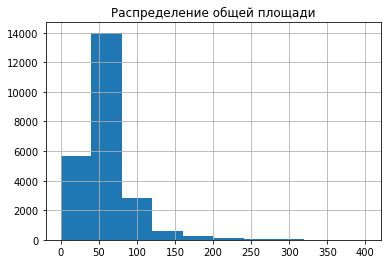

In [41]:
# строим гистограмму по столбцу общей площади. Она в целом имеет нормальное распределение. Да тут я схитрил ограничив 400 метрами:)
data['total_area'].hist(range = (0, 400))
plt.title('Распределение общей площади');

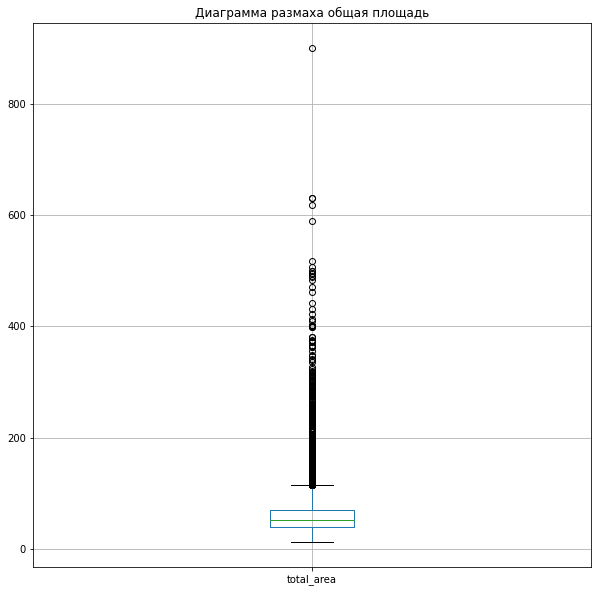

In [42]:
# построили диаграмму размаха
data['total_area'].plot.box(grid = True, figsize =(10,10))
plt.title('Диаграмма размаха общая площадь');

Множество выбросов выше полуторного межквартильного размаха, которые нужно исключить

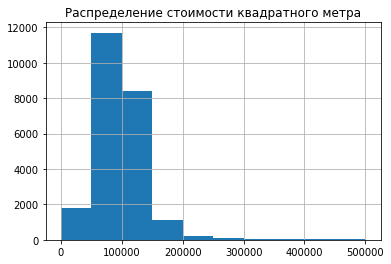

In [43]:
# строим гистограмму по столбцу стоимость кв. метра. Она в целом имеет нормальное распределение
data['price_square_meter'].hist(range = (0, 500_000))
plt.title('Распределение стоимости квадратного метра')
plt.show();

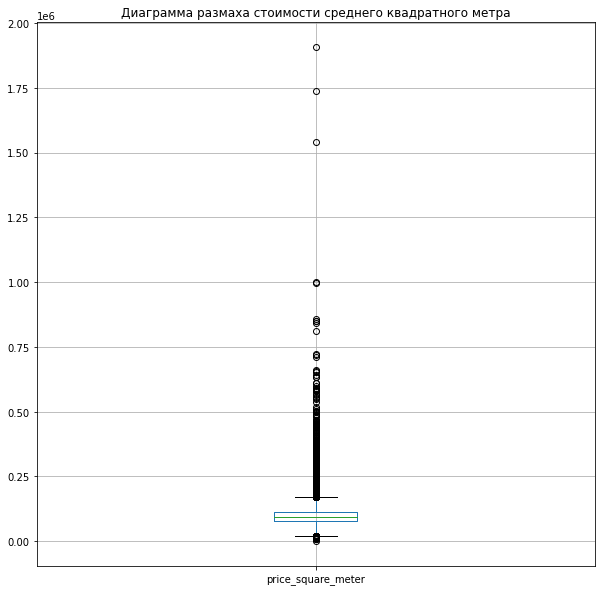

In [44]:
# построили диаграмму размаха
data['price_square_meter'].plot.box(grid = True, figsize =(10,10))
plt.title('Диаграмма размаха стоимости среднего квадратного метра');

Сильное искажение из-за выбросов. Видимо в выборку попало элитное жилье:)

In [45]:
columns_to_quantile = ['ceiling_height', 'price_square_meter', 'total_area', 'days_exposition', 'rooms'] 
for element in columns_to_quantile:
    q1 = data[element].quantile(0.25)
    q3 = data[element].quantile(0.75)
    iqr = q3 - q1 
    first = q1 - 1.5 * iqr
    last = q3 + 1.5 * iqr# iqr
# границы интервала наиболее вероятных значений
    print(element)
    print(first, last)

ceiling_height
2.45 2.8500000000000005
price_square_meter
20095.5 170683.5
total_area
-4.550000000000004 114.25
days_exposition
-184.5 427.5
rooms
-2.0 6.0


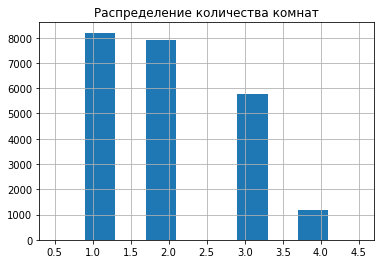

In [46]:
# строим гистограмму по столбцу количество комнат. Она в целом имеет нормальное распределение
data['rooms'].hist(range = (0.5, 4.5))
plt.title('Распределение количества комнат');

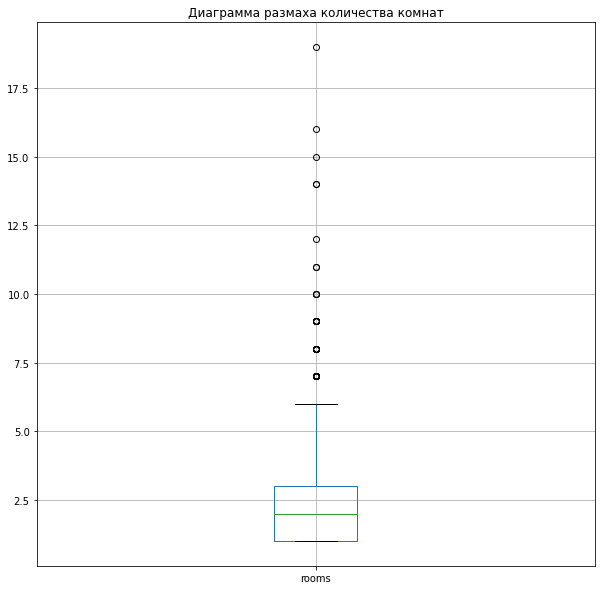

In [47]:
# построили диаграмму размаха
data['rooms'].plot.box(grid = True, figsize =(10,10))
plt.title('Диаграмма размаха количества комнат');

Немного выбросов

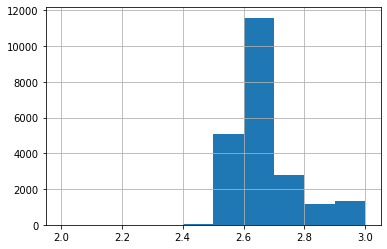

In [48]:
# строим гистограмму по столбцу высота потолков. Она в целом имеет нормальное распределение
data['ceiling_height'].hist(range = (2, 3));

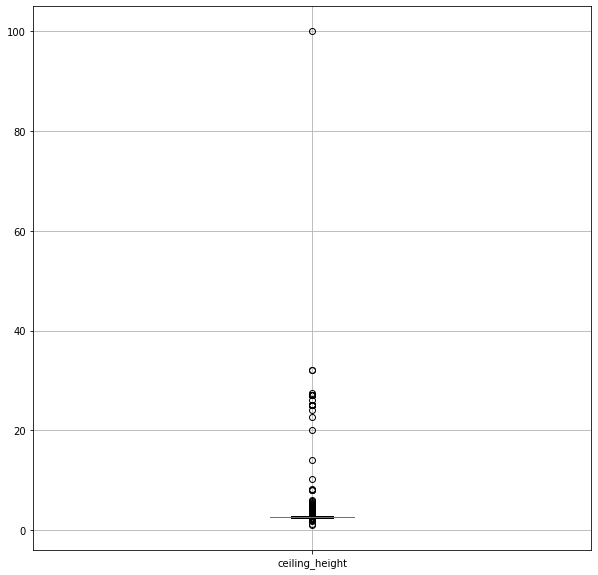

In [49]:
# построили диаграмму размаха
data['ceiling_height'].plot.box(grid = True, figsize =(10,10));

Много выбросов которые сильно искажают диаграмму размаха

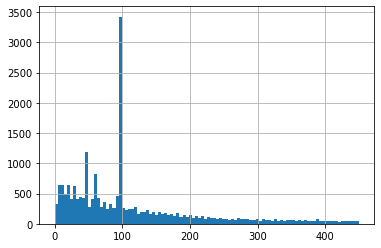

In [50]:
# строим гистограмму по столбцу количество дней продажи. Она в целом имеет нормальное распределение
data['days_exposition'].hist(bins=100, range = (0, 450));

In [51]:
data['days_exposition'].median(), data['days_exposition'].mean() 

(95.0, 169.2036919159771)

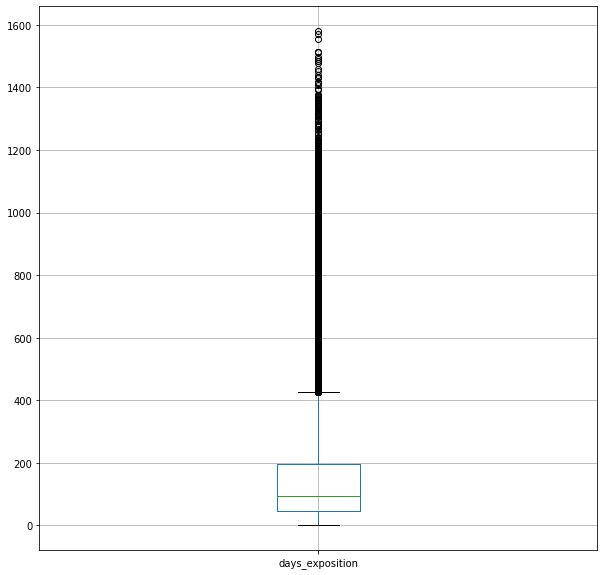

In [52]:
data['days_exposition'].plot.box(grid = True, figsize =(10,10));

судя по медиане нормальный срок продажи квартиры около 3 месяцев (95 дней), если мы продаем быстрее 45 дней то можно считать, что продали быстро, если более 430 дней ( квартиль3 + межквартильное расстояние * 1,5) то считаем, что продаем очень долго.

In [53]:
# просто вспомнили, что есть такой метод для вычисления квартилей, среднего, отколонения
data.describe()

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,living_total_area,kitchen_total_area
count,23565.000000,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,...,8030.000000,18065.000000,9036.000000,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,11846.826183,9.878421,6.540058e+06,60.322824,2.078888,2.724530,10.675875,34.102255,5.878124,10.423234,...,490.580448,0.769499,518.289509,169.203692,9.940539e+04,2.567367,6.401570,2017.371016,0.567348,0.189397
std,6842.594114,5.681156,1.091093e+07,35.657060,1.066503,0.991026,6.594823,21.189133,4.871485,5.631746,...,341.572956,0.938669,278.009558,206.497729,5.038944e+04,1.788279,3.492948,1.037393,0.123586,0.075767
min,0.000000,0.000000,1.219000e+04,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,...,1.000000,0.000000,13.000000,1.000000,1.110000e+02,0.000000,1.000000,2014.000000,0.021583,0.018200
25%,5921.000000,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.300000,...,288.000000,0.000000,293.000000,45.000000,7.656600e+04,1.000000,3.000000,2017.000000,0.491228,0.133654
50%,11850.000000,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,...,455.000000,1.000000,503.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.568182,0.173913
75%,17774.000000,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,41.100000,8.000000,11.410000,...,612.000000,1.000000,730.000000,198.000000,1.142130e+05,4.000000,10.000000,2018.000000,0.642708,0.234513
max,23698.000000,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,2.307692,0.787879


In [54]:
data = data.loc[(data['ceiling_height'] >= 2.45) & (data['ceiling_height'] <= 2.85) &
                (data['price_square_meter'] > 20095.5) & (data['price_square_meter'] < 170683.5) &
                (data['total_area'] > 0) & (data['total_area'] < 114.25) &
                (data['days_exposition'] >= 1) & (data['days_exposition'] < 427.5)]

In [55]:
# делаем срез по столбцу количество комнат
data = data.query('1 < rooms < 6')
data

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_category,living_total_area,kitchen_total_area
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,...,2.0,755.0,95.0,120370,3,3,2019,другой,0.472222,0.231481
7,7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,30.0,22,...,0.0,NaN,95.0,110544,3,4,2019,другой,0.418994,0.263966
9,9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,...,0.0,NaN,289.0,88524,6,2,2017,другой,0.714754,0.106557
11,11,9,3300000.0,44.0,2018-08-27,2,2.65,5.0,31.0,4,...,0.0,NaN,7.0,75000,0,8,2018,другой,0.704545,0.136364
12,12,10,3890000.0,54.0,2016-06-30,2,2.65,5.0,30.0,5,...,NaN,NaN,90.0,72037,3,6,2016,последний,0.555556,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23549,23683,16,2100000.0,62.8,2018-09-18,4,2.50,5.0,45.5,3,...,NaN,NaN,95.0,33439,1,9,2018,другой,0.724522,0.087580
23556,23690,3,5500000.0,52.0,2018-07-19,2,2.65,5.0,31.0,2,...,0.0,NaN,15.0,105769,3,7,2018,другой,0.596154,0.115385
23559,23693,9,4600000.0,62.4,2016-08-05,3,2.60,9.0,40.0,8,...,1.0,675.0,239.0,73717,4,8,2016,другой,0.641026,0.128205
23561,23695,14,3100000.0,59.0,2018-01-15,3,2.65,5.0,38.0,4,...,NaN,NaN,45.0,52542,0,1,2018,другой,0.644068,0.144068


Более 50 процентов данных удалено, что не есть правильно судя по-всему.

In [56]:
# считаем корреляцию между стоимостью кв. метра и площадью
data['price_square_meter'].corr(data['total_area'])

0.2068841298411588

корреляция слабая

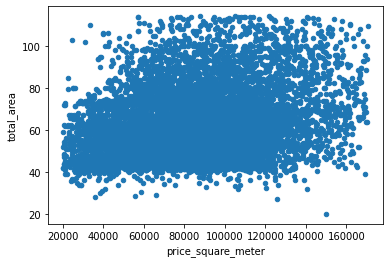

In [57]:
data.plot(x='price_square_meter', y='total_area', kind='scatter');

Видно равномерное распределение почти параллельно оси Х, что говорит о слабой зависимости

In [58]:
# считаем корреляцию между стоимостью кв. метра и количеством комнат
data['price_square_meter'].corr(data['rooms'])

-0.08241603923149639

Корреляция отсутствует

In [59]:
# считаем корреляцию между стоимостью кв. метра и площадью
data['price_square_meter'].corr(data['city_centers_nearest'])

-0.39837948294938985

<AxesSubplot:xlabel='price_square_meter', ylabel='city_centers_nearest'>

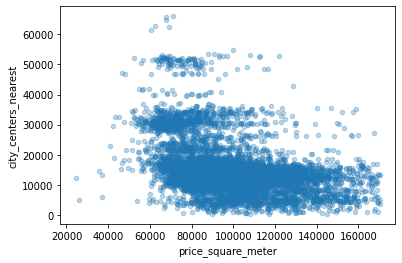

In [60]:
data.plot(x='price_square_meter', y='city_centers_nearest', kind='scatter', alpha=0.3)

Корреляция слабая, но обратная связь есть, что логично (чем меньше расстояние до центра, тем выше цена кв. метра)

In [93]:
data_corr = data.corr()

<AxesSubplot:>

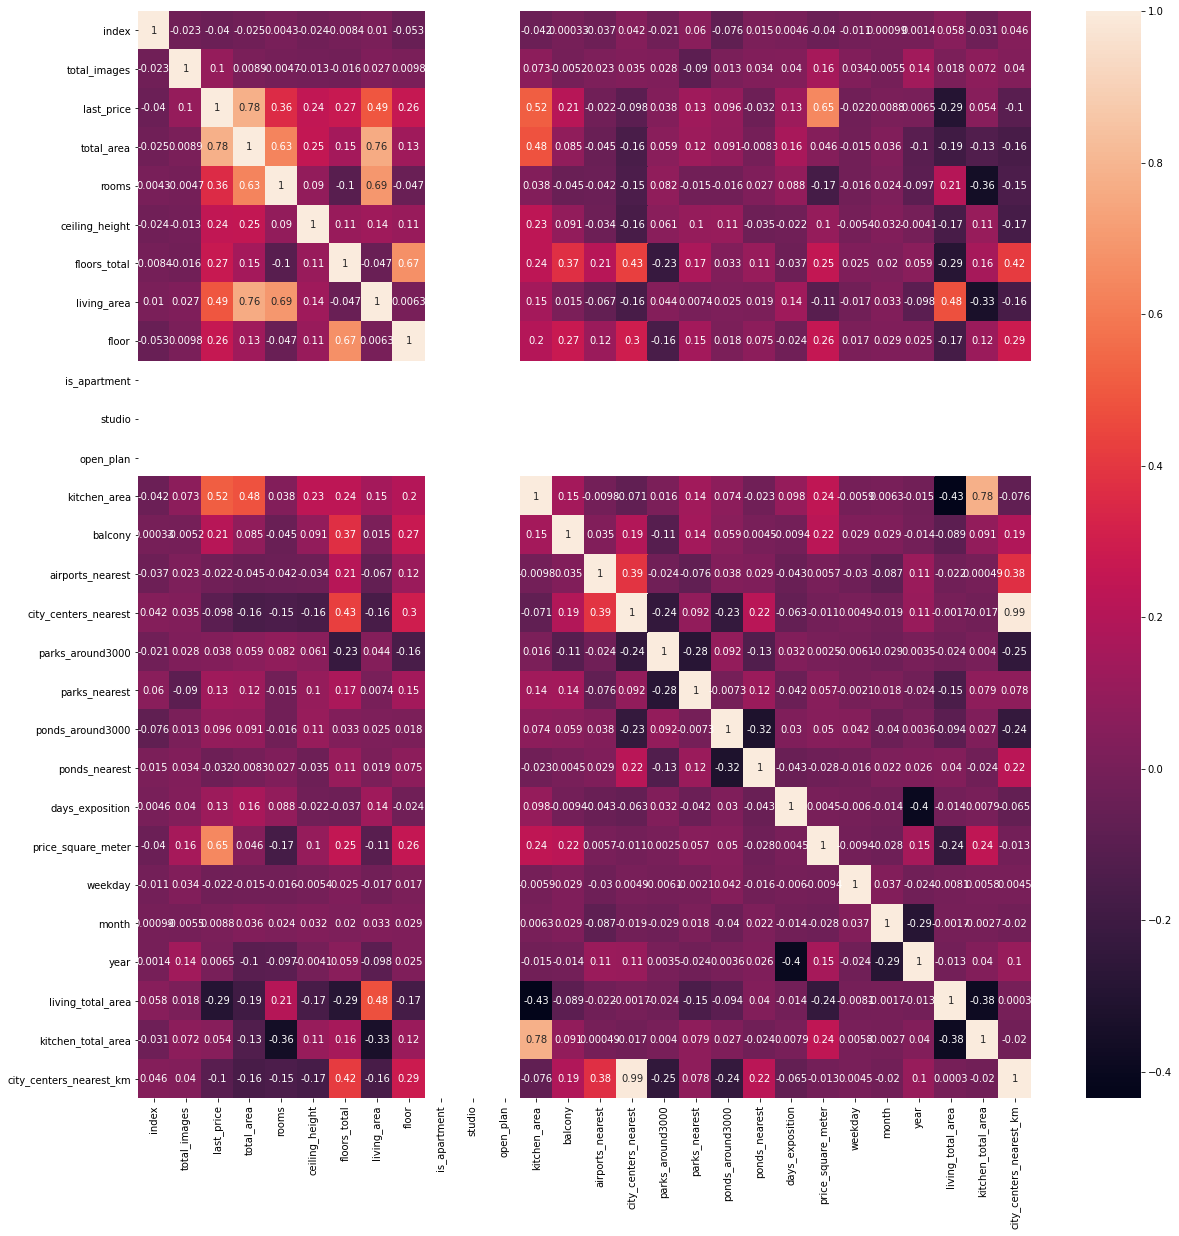

In [94]:
plt.figure(figsize = (20, 20))
sn.heatmap(data_corr, annot=True)

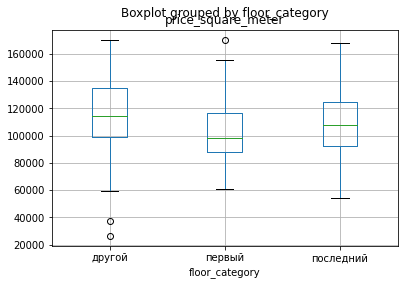

In [95]:
#Строим диаграммы размаха для столбца категория этажей
data.boxplot(column='price_square_meter', by='floor_category');

Видна в общем известная истина, что люди выбирают охотнее квартиры на этажах между первым и последним невключительно. (цена за кв. метр в более высоком по цене интервале, соответсвенно и медиана выше)

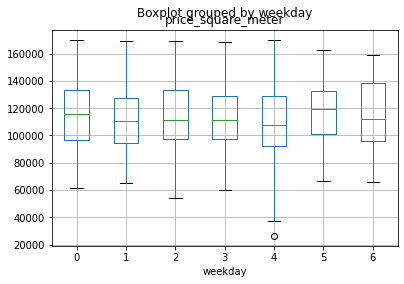

In [96]:
#Строим диаграммы размаха для столбца день размещения
data.boxplot(column='price_square_meter', by='weekday');

Зависимости от дня размещения фактически нет.

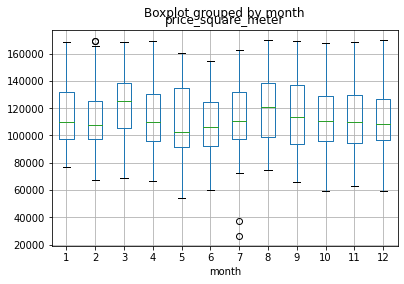

In [97]:
#Строим диаграммы размаха для столбца месяц размещения
data.boxplot(column='price_square_meter', by='month');

Можно видеть стандартный слабый летний сезон, когда цены нескольк ниже других месяцев.

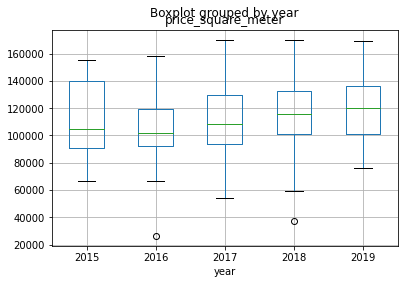

In [98]:
#Строим диаграммы размаха для столбца год продажи
data.boxplot(column='price_square_meter', by='year');

По этой диаграмме виден постепенный рост цен, но с небольшой паузой в кризисне 2015-2016 годы.

In [67]:
# выделяем топ -10 населенных пунктов по количеству объявлений
top_10 = data['locality_name'].value_counts().head(10).index.values
print(top_10)
data = data[data['locality_name'].isin(top_10)]

['санкт-петербург' 'шушары' 'всеволожск' 'колпино' 'гатчина' 'пушкин'
 'мурино' 'кудрово' 'выборг' 'парголово']


In [68]:
# делаем сводную таблицу по топ-10 со средней ценой и количеством объявлений
mean_spb = data.pivot_table(index = 'locality_name', values = 'price_square_meter', aggfunc = ['count', 'mean', 'median'])

In [69]:
mean_spb

,count,mean,median
,price_square_meter,price_square_meter,price_square_meter
locality_name,,,
всеволожск,208,65484.211538,63961.5
выборг,133,56053.060150,55187.0
гатчина,172,67971.651163,66386.0
колпино,200,71856.715000,71097.5
кудрово,160,91747.000000,90423.5
мурино,168,76877.202381,77304.0
парголово,126,84346.857143,83265.0
пушкин,168,100004.809524,97358.5


На удивление рядом с явным лидером СПБ есть и город Пушкин, что на мой неискушенный взгляд является ошибкой обусловенной небольшой выборкой по г. Пушкин. Аутсайдеры Выборг и Всеволжс.

In [70]:
# срезаем до санкт-петербурга
data = data.query('locality_name == "санкт-петербург"')

In [71]:
# переводим в километры и добавляем столбец расстояние до центра в км, окргуляем до целого числа
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].round()

In [72]:
data.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_category,living_total_area,kitchen_total_area,city_centers_nearest_km
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,...,755.0,95.0,120370,3,3,2019,другой,0.472222,0.231481,16.0
7,7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,30.0,22,...,NaN,95.0,110544,3,4,2019,другой,0.418994,0.263966,12.0
9,9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,...,NaN,289.0,88524,6,2,2017,другой,0.714754,0.106557,15.0
24,24,8,6500000.0,97.2,2015-10-31,2,2.65,3.0,46.5,1,...,124.0,265.0,66872,5,10,2015,первый,0.478395,0.201646,2.0
25,25,3,6800000.0,76.0,2015-10-01,2,2.75,23.0,39.0,18,...,564.0,300.0,89473,3,10,2015,другой,0.513158,0.197368,15.0


In [73]:
data.describe()

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,living_total_area,kitchen_total_area,city_centers_nearest_km
count,6943.000000,6943.000000,6.943000e+03,6943.000000,6943.000000,6943.000000,6943.000000,6943.000000,6943.000000,6943.000000,...,6930.000000,3173.000000,6943.00000,6943.000000,6943.000000,6943.000000,6943.000000,6943.000000,6943.000000,6930.000000
mean,11826.387585,10.501512,6.437662e+06,63.179880,2.508714,2.626306,11.360651,37.328728,6.081809,9.753936,...,0.643290,545.220927,110.38456,100868.659657,2.588218,6.409909,2017.523981,0.597998,0.154935,12.602453
std,6791.657019,5.751376,2.463733e+06,16.528527,0.617056,0.084349,6.100769,10.031705,4.725717,4.130893,...,0.834753,274.868533,94.37288,21216.688229,1.792286,3.458304,0.923442,0.091203,0.049406,4.230884
min,0.000000,0.000000,1.200000e+06,20.000000,2.000000,2.450000,1.000000,5.400000,1.000000,2.890000,...,0.000000,13.000000,1.00000,24439.000000,0.000000,1.000000,2014.000000,0.069588,0.043524,0.000000
25%,5950.500000,6.000000,4.650000e+06,50.000000,2.000000,2.550000,6.000000,30.000000,3.000000,7.000000,...,0.000000,331.000000,44.00000,85563.500000,1.000000,3.000000,2017.000000,0.547542,0.123288,11.000000
50%,11826.000000,10.000000,5.800000e+06,60.000000,2.000000,2.650000,9.000000,34.100000,5.000000,9.000000,...,0.000000,540.000000,95.00000,97368.000000,3.000000,6.000000,2018.000000,0.606145,0.148208,13.000000
75%,17665.500000,15.000000,7.500000e+06,72.000000,3.000000,2.650000,16.000000,43.000000,8.000000,11.200000,...,1.000000,758.000000,143.00000,112410.000000,4.000000,10.000000,2018.000000,0.656716,0.175000,15.000000
max,23690.000000,50.000000,1.870000e+07,114.200000,5.000000,2.850000,36.000000,93.600000,33.000000,44.900000,...,3.000000,1337.000000,427.00000,170464.000000,6.000000,12.000000,2019.000000,0.956522,0.615385,29.000000


In [74]:
# создаем сводную таблицу со средней стоимостью за квадрат по удаленности от центра
km_spb = data.pivot_table(index = 'city_centers_nearest_km', values = 'price_square_meter', aggfunc = 'mean')
km_spb

,price_square_meter
city_centers_nearest_km,
0.0,114373.333333
1.0,117332.525000
2.0,115689.580645
3.0,111162.222222
4.0,112244.720238
5.0,114453.467980
6.0,117919.342697
7.0,114012.278912
8.0,111984.004545


<AxesSubplot:xlabel='city_centers_nearest_km'>

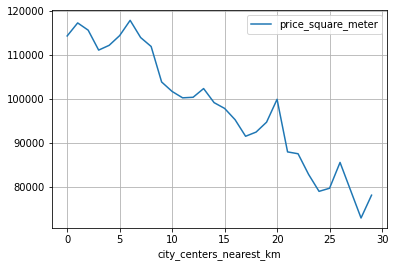

In [75]:
# строим график
km_spb.plot(grid=True)

Центральная зона начинается от 8 километров включитьельно, поскольк цена приблизительно одинаковая в интервале от 0 до 8 включительно

In [76]:
# срезаем до центральной зоны СПБ
data = data.query('city_centers_nearest_km <= 8')

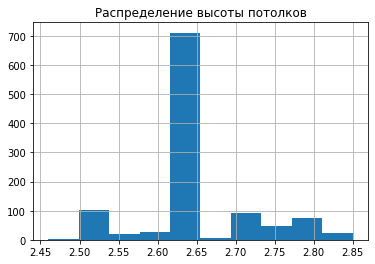

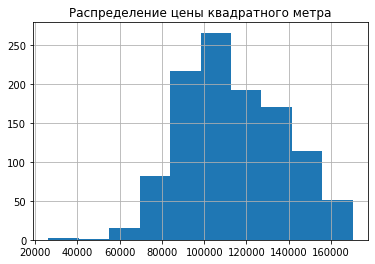

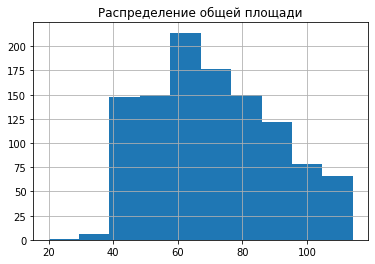

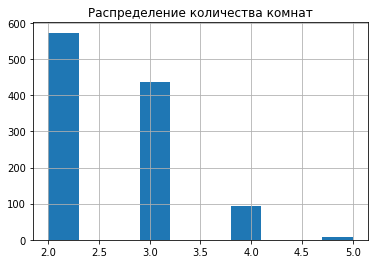

In [77]:
# строим гистограммы указанных столбцов
columns_to_hist = {'ceiling_height' : 'Распределение высоты потолков', 'price_square_meter' : 'Распределение цены квадратного метра',
                   'total_area' : 'Распределение общей площади', 'rooms' : 'Распределение количества комнат'} 
for hist, titl in columns_to_hist.items():
    data[hist].hist()
    plt.title(titl)
    plt.show()

In [78]:
data['price_square_meter'].corr(data['rooms'])

-0.17234091668771978

In [79]:
data['price_square_meter'].corr(data['floor'])

0.2601087433502438

<AxesSubplot:xlabel='price_square_meter', ylabel='floor'>

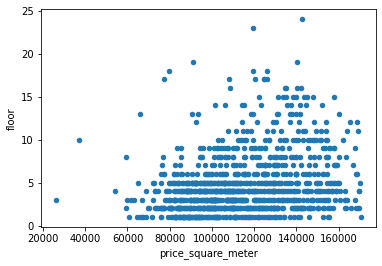

In [80]:
data.plot(x='price_square_meter', y='floor', kind='scatter')

In [81]:
data['price_square_meter'].corr(data['city_centers_nearest'])

-0.011237447683069035

In [82]:
data['price_square_meter'].corr(data['days_exposition'])

0.004515514974353589

Небольшая зависимость прослеживается только в случае с этажом. По сравнению с общей картиной ожидаемо снизилась корреляция с расстоянием до центра.

## Общий вывод

Провел предобработку данных, заполнил пропуски, часть пропусков удалил, добавил несколько столбцов для анализа. Поработал с определением выбросов, определил границы нормального распределения.
Провел исследование зависимости стоимости квадратного метра от различных факторов. Главный фактор определяющий стоимость квадратного метра - это расстояние до центра, который в Санкт-Петербурге определяется в интервале до 8 километров включительно. Вероятно заполнение пропусков в столбцах с аэропортом, прудами и парками реальными данными показало бы картину более дифференцированной. Также на мой взгляд не хватает данных о транспортной доступности метро. Думаю, это важный фактор ценообразования стоимости квартиры.